<a href="https://colab.research.google.com/github/linhvien/Data-Visualization-with-Python/blob/main/Word_Cloud_Wine_Review_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

!pip install wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings("ignore")

import glob
from os import path

#Load data

In [ ]:
#Create connection between GGDrive and GGColab
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#Authenticate with GG ID
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#Get file from GG Drive to Colab
downloaded = drive.CreateFile({'id':"1P0-N8kVfs6rG-Gq1WyvQkJcfryPQ6y_i"})   # replace the id with id of file you want to access
downloaded.GetContentFile('winemag-data-130k-v2.csv')        # replace the file name with your file

In [ ]:
#Load wine review dataset 
df = pd.read_csv('winemag-data-130k-v2.csv',index_col=0)
df.tail()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [ ]:
df = df.dropna(how='all')

In [ ]:
#Print out some basic information
print('There are {} observations and {} features in the dataset. \n'
      .format(df.shape[0],df.shape[1]))

print('There are {} types of wine in the dataset such as {}... \n'
      .format(len(df['variety'].unique()),", ".join(df['variety'].unique()[0:5])))

print('There are {} countries producing wine in the dataset such as {} ...\n'
      .format(len(df['country'].unique()),", ".join(df['country'].unique()[0:5])))

There are 129971 observations and 13 features in the dataset. 

There are 708 types of wine in the dataset such as White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir... 

There are 44 countries producing wine in the dataset such as Italy, Portugal, US, Spain, France ...



In [ ]:
# Groupby by country
country = df.groupby('country')
# Summary statistic of all countries
country.describe().head()

points                       ... price               
                         count       mean       std  ...   50%    75%     max
country                                              ...                     
Argentina               3800.0  86.710263  3.179627  ...  17.0  25.00   230.0
Armenia                    2.0  87.500000  0.707107  ...  14.5  14.75    15.0
Australia               2329.0  88.580507  2.989900  ...  21.0  38.00   850.0
Austria                 3345.0  90.101345  2.499799  ...  25.0  36.50  1100.0
Bosnia and Herzegovina     2.0  86.500000  2.121320  ...  12.5  12.75    13.0

[5 rows x 16 columns]

In [ ]:
#Get top 5 highest average points among all countries
country.mean().sort_values(by="points",ascending=False).head()

,points,price
country,,
England,91.581081,51.681159
India,90.222222,13.333333
Austria,90.101345,30.762772
Germany,89.851732,42.257547
Canada,89.369650,35.712598


#Bar plots

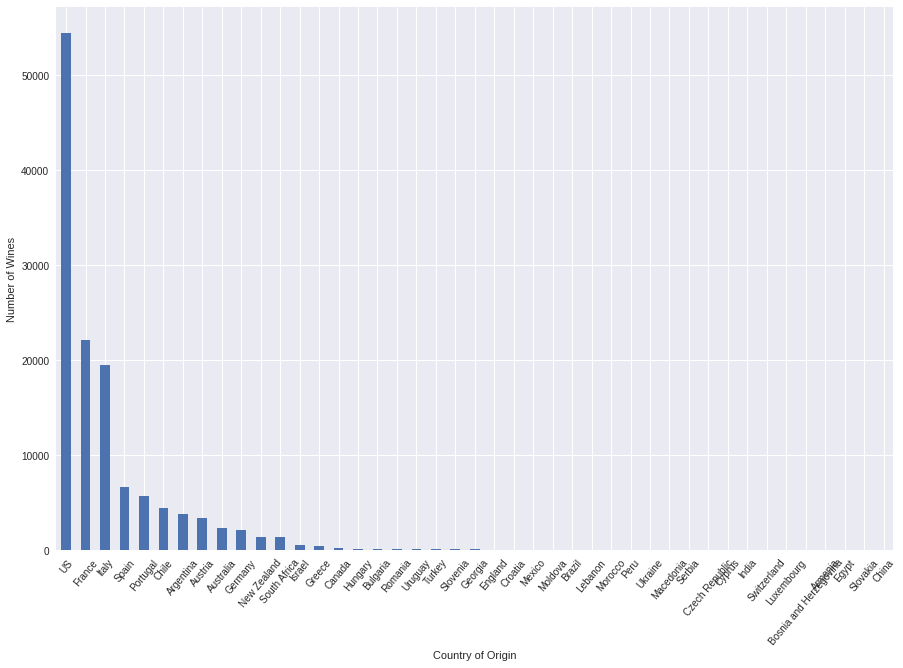

In [ ]:
#Top countries produce the most number of wine types
plt.style.use('seaborn')
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
#//df['country'].value_counts().plot.bar()

plt.xticks(rotation=50)
plt.xlabel('Country of Origin')
plt.ylabel('Number of Wines')
plt.show()

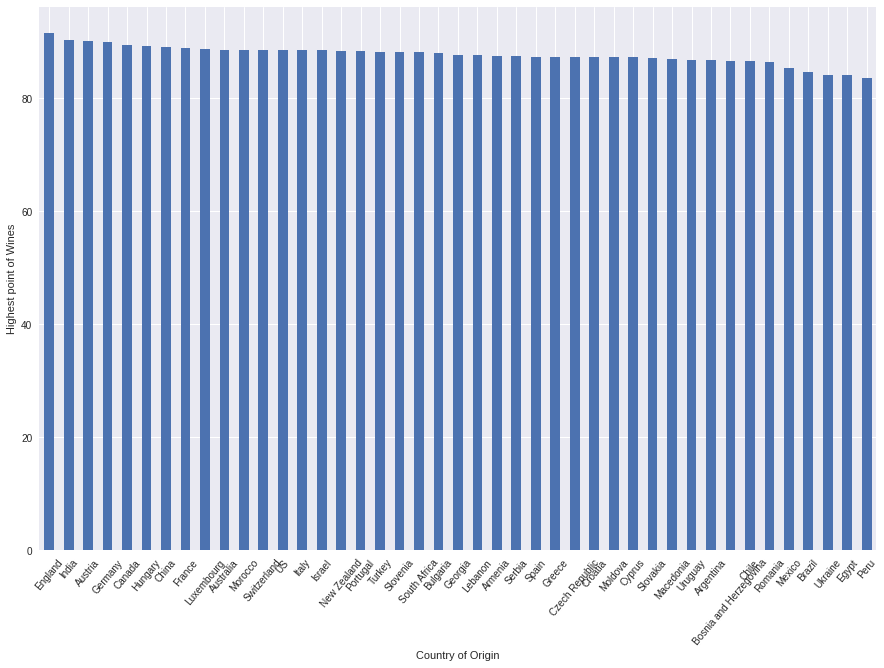

In [ ]:
#Top countries have the top points in wine review
plt.figure(figsize=(15,10))
country['points'].mean().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines")
plt.show()

#Word Cloud

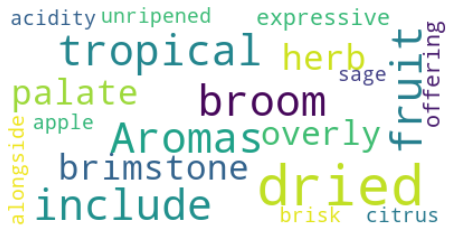

In [ ]:
#Display the cloud using matplotlib
# Start with one review:
text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

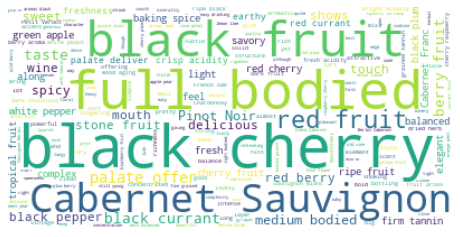

In [ ]:
#Combine all wine reviews into one big text and create a big fat cloud
text=" ".join(review for review in df['description'])
#Create stopword list
stopwords = set(STOPWORDS)
#Remove common words
stopwords.update(["drink", "now", "wine", "flavor", "flavors","finish","note","notes","show","nose"])

#Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Create a shape for word cloud

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
img = glob.glob('/gdrive/My Drive/Colab Notebooks/Image/wine_mask.png',recursive=True)
img

['/gdrive/My Drive/Colab Notebooks/Image/wine_mask.png']

In [ ]:
display(Image(img))

In [ ]:
wine_mask = np.array([np.asarray(Image.open(i)) for i in img])
wine_mask

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [ ]:
wine_mask.shape[1]

512

In [ ]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
  transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

ValueError: ignored

In [ ]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()